# Imports des librairies

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import json

## Chargement des données des vidéos

In [45]:
with open("collaborations.json") as file:
    collaborations_data = json.load(file)

## Création du Graphe et ajout des collaborations

In [46]:
# Création du graphe
G = nx.MultiGraph() 

# Ajout des nœuds et des arêtes avec des vidéos comme attribut
for youTuber, collaborators in collaborations_data.items():
    for collaborator, videos in collaborators.items():
        for video in videos:
            G.add_edge(youTuber, collaborator, video=video)

## Visualisation du graphe

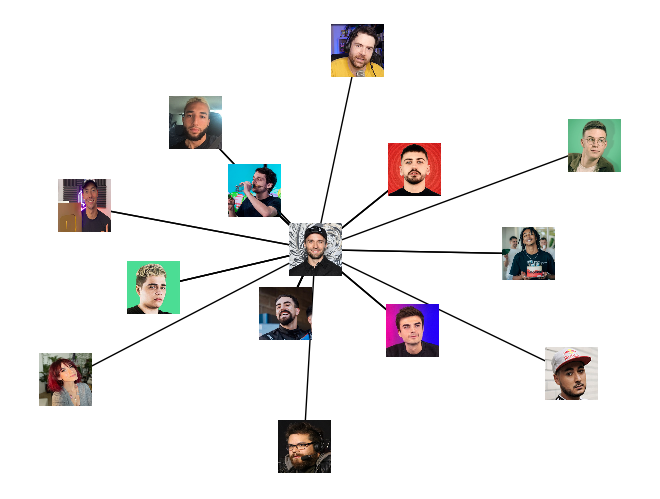

In [51]:
# Visualisation basique du graphe
pos = nx.spring_layout(G)  # Positionnement des nœuds
nx.draw(G, pos, with_labels=False)

# Ajout des images redimensionnées
for youTuber in G.nodes():
    img_path = f"assets/{youTuber}.png"
    with Image.open(img_path) as img:
        img_resized = img.resize((250, 250))  # Redimensionner l'image
        imagebox = OffsetImage(img_resized, zoom=0.15)
        ab = AnnotationBbox(imagebox, pos[youTuber], frameon=False)
        plt.gca().add_artist(ab)

plt.show()